In [1]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)

1.19.2
3.3.2


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mglearn

w[0]: 0.393906  b: -0.031804


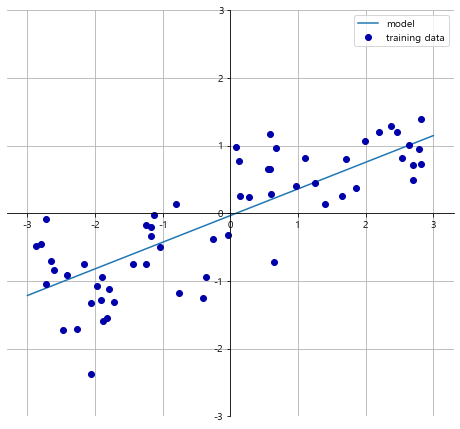

In [6]:
mglearn.plots.plot_linear_regression_wave()


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()

X = boston.data     #입력
y = boston.target   #출력


## 데이터 나누기
 * 학습 데이터
 * 테스트 데이터

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 42)


In [12]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [13]:
import pandas as pd

In [15]:
dict_dat = {'실제값' : y_test, '예측값' : pred, '오차' : y_test- pred,
            '오차절대값' : abs(y_test-pred), '오차제곱' : (y_test-pred)**2}
dat = pd.DataFrame(dict_dat)
dat

,실제값,예측값,오차,오차절대값,오차제곱
0,23.6,28.648960,-5.048960,5.048960,25.491998
1,32.4,36.495014,-4.095014,4.095014,16.769138
2,13.6,15.411193,-1.811193,1.811193,3.280421
3,22.8,25.403213,-2.603213,2.603213,6.776718
4,16.1,18.855280,-2.755280,2.755280,7.591567
...,...,...,...,...,...
147,17.1,17.403672,-0.303672,0.303672,0.092216
148,14.5,13.385941,1.114059,1.114059,1.241127
149,50.0,39.983425,10.016575,10.016575,100.331779
150,14.3,16.682863,-2.382863,2.382863,5.678036


In [16]:
### MME
mae_val = dat['오차절대값'].sum()/dat.shape[0]
mae_val

3.1627098714573783

In [17]:
### MSE
mse_val = dat['오차제곱'].sum()/dat.shape[0]
mse_val

21.517444231176995

In [18]:
### RMSE
mse_val = dat['오차제곱'].sum()/dat.shape[0]
rmse_val = mse_val ** 0.5
rmse_val

4.638689926172797

In [19]:
# R^2의 값을 구하기- 결정계수 구하기
print("훈련 데이터 세트 점수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(model.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.74
테스트 데이터 세트 점수 : 0.71


In [20]:
for i in range(1, 6, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/10), random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred[:5]
    
    mae = np.abs(y_test - pred).sum() / len(pred)
    mse = ((y_test - pred)**2).sum()/len(pred)
    rmse = (((y_test - pred)**2).sum()/len(pred))**0.5
    
    print("test_size : ",(i/10))
    print("MAE : {:.3f}".format(mae))
    print("MSE : {:.3f}".format(mse))
    print("RMSE : {:.3f}".format(rmse))
    print("")

test_size :  0.1
MAE : 2.834
MSE : 14.996
RMSE : 3.872

test_size :  0.2
MAE : 3.189
MSE : 24.291
RMSE : 4.929

test_size :  0.3
MAE : 3.163
MSE : 21.517
RMSE : 4.639

test_size :  0.4
MAE : 3.298
MSE : 21.833
RMSE : 4.673

test_size :  0.5
MAE : 3.398
MSE : 25.175
RMSE : 5.018



### 지도학습
 * Regression
    * 선형회귀
    * feature가 하나 : 단순선형회귀
    * feature가 여러개 : 다중선형회구
        * y = w1*x1 + w2*x2 +b
         * w1, w2, b
        * MSE가 최소가 되도록 결정된다.
 * Chlassification

In [23]:
import mglearn

In [24]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀
import pandas as pd

In [25]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline


In [31]:
boston = load_boston()

df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 단순선형 회귀, 다중 선형 회귀

In [45]:
df_boston.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [46]:
sel = df_boston.columns[:-1]
X = df_boston[sel]        #입력
y = df_boston['target']   #출력

In [47]:
### 데이터 나누기

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)


In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [49]:
# 학습 데이터 셋의 결정개수
print('학습 데이터 셋 : ' , model.score(X_train,y_train))
print(' 테스트 데이터 셋 : ',  model.score(X_test, y_test))

학습 데이터 셋 :  0.7480872598623441
 테스트 데이터 셋 :  0.6844267283527129


In [51]:
model.coaf_.model.intercept_

AttributeError: 'LinearRegression' object has no attribute 'coaf_'

In [52]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀

<AxesSubplot:>

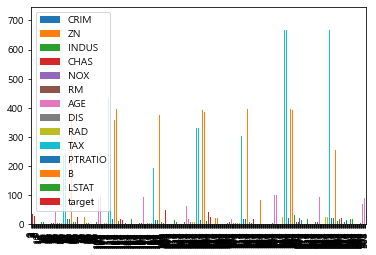

In [53]:
df_boston.plot(kind= 'bar')

In [54]:
ex_X = PolynomialFeatures(degree=2,
         include_bias=False).fit_transform(X)  # 데이터 feature 추가 생성
ex_X.shape

X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78


In [58]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀

In [59]:
ex_X = PolynomialFeatures(degree=2,
         include_bias=False).fit_transform(X)  # 데이터 feature 추가 생성
ex_X.shape

X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78


In [62]:
import numpy as np

# sel = ["INDUS",'RM']
sel = df_boston.columns[ : -1]
X = df_boston[sel]       # 입력
y = df_boston['target']    # 출력

In [63]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))


from sklearn.linear_model import Lasso, Ridge # Lasso : L1, Ridge: L2

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78


In [64]:
# from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(ridge)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

Ridge()
훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.78


In [65]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

Ridge(alpha=10)
훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


In [66]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

Ridge(alpha=0.1)
훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.79


In [67]:
ridge_p = [10, 5, 1, 0.1, 0.01]

for i in ridge_p:
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    
    print("alpha : {}".format(i))
    print("훈련 데이터 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
    print("테스트 데이터 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

alpha : 10
훈련 데이터 세트 점수 : 0.93
테스트 데이터 세트 점수 : 0.77
alpha : 5
훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.77
alpha : 1
훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78
alpha : 0.1
훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.79
alpha : 0.01
훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.79


In [68]:
alpha_p = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for p in alpha_p:
    lasso = Lasso(alpha=p).fit(X_train, y_train)
    tr_score = lasso.score(X_train, y_train)
    test_score = lasso.score(X_test, y_test)
    print("alpha : {} 학습 : {}, 테스트 : {}".format(p,tr_score, test_score))
    print("유효한 feature 개수 : ", np.sum(lasso.coef_ !=0))

C:\Users\gmlck\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1166.388259503383, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\gmlck\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1197.653601770882, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


alpha : 0.0001 학습 : 0.9308925389867302, 테스트 : 0.7769502279359625
유효한 feature 개수 :  104


C:\Users\gmlck\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1298.0169527027906, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


alpha : 0.001 학습 : 0.9305964312542403, 테스트 : 0.7788590525266584
유효한 feature 개수 :  102
alpha : 0.01 학습 : 0.9282233610593648, 테스트 : 0.7766707815593589
유효한 feature 개수 :  95


C:\Users\gmlck\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1580.3405595582046, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\gmlck\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2113.1017927084163, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


alpha : 0.1 학습 : 0.9189245627705043, 테스트 : 0.7872061986906567
유효한 feature 개수 :  74
alpha : 1 학습 : 0.8952529515349494, 테스트 : 0.7997588192632035
유효한 feature 개수 :  55
alpha : 10 학습 : 0.8657971088068704, 테스트 : 0.7691753916262616
유효한 feature 개수 :  33


C:\Users\gmlck\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2596.685314180235, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [70]:
# Ridge - L2규제, 0에 가깝게 만들지만, 0이 되는 친구는 없다.
ridge = Ridge().fit(X_train,y_train)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9390400914681802
0.7751633327566851


학습 :  0.9448313975211594
학습 :  0.77583783932554
학습 :  0.9390400914681802
학습 :  0.7751633327566851


(-800.0, 800.0)

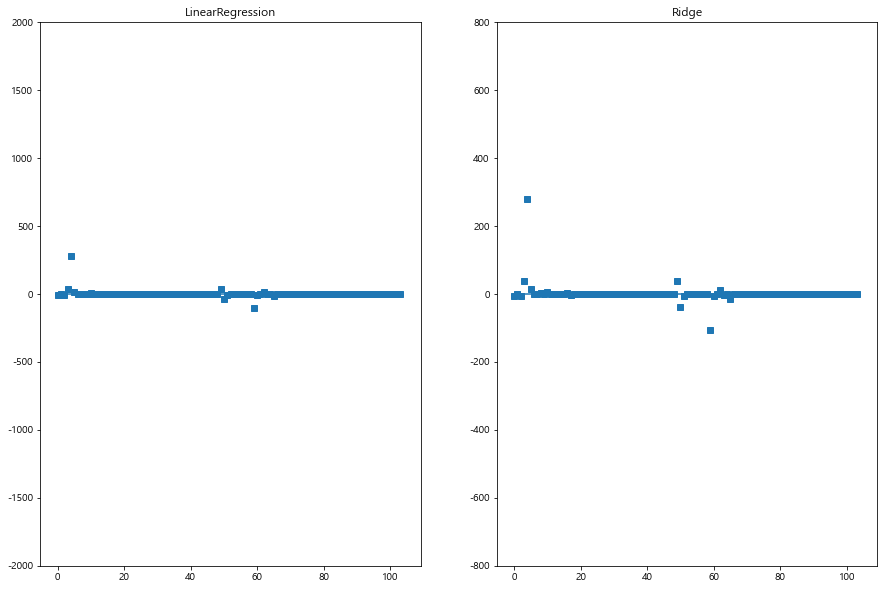

In [72]:
# Ridge - L2규제, 0에 가깝게 만들지만, 0이 되는 친구는 없다.
lr = LinearRegression().fit(X_train, y_train)
print("학습 : ", lr.score(X_train, y_train) )
print("학습 : ", lr.score(X_test, y_test) )
# Ridge - L2규제, 0에 가깝게 만들지만, 0이 되는 친구는 없다.
ridge = Ridge().fit(X_train, y_train)
print("학습 : ", ridge.score(X_train, y_train) )
print("학습 : ", ridge.score(X_test, y_test) )
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.hlines(0,0, len(lr.coef_))
plt.plot(lr.coef_, 's', label="LinearRegression")
plt.title('LinearRegression')
plt.ylim(-2000,2000)
plt.subplot(1, 2, 2)
plt.hlines(0,0, len(lr.coef_))
plt.plot(lr.coef_, 's', label="Ridge")
plt.title('Ridge')
plt.ylim(-800,800)